In [145]:
import numpy as np

alpha=1.7
beta=0
gamma=1.0
delta=1.0

num=1000 #number of Monte-Carlo iterations. As it is seen from pictures below that 1000 iterations is enough

quantiles=[] #
mean_quantiles=[] #list of mean values of estimated quantiles
rmse=[] #list of variances for estimated quntiles

for i in range(num):
    u=np.random.uniform(-np.pi/2, np.pi/2,751) #uniform distributed variable
    w=np.random.exponential(1,751) #exponential distributed variable

    x=np.sin(alpha*u)/np.cos(u)**(1/alpha)*(np.cos(u*(1-alpha))/w)**(1/alpha-1) #stable random variable simulated using Chambers, Mallows and Stuck (CMS) method
    P=gamma*x+delta #stable random distributed price with corresponding parameters gamma and delta

    r1=np.array([P[i+1]/P[i]-1 for i in range(750)]) #1-day returns
    r10=np.array([P[i+10]/P[i]-1 for i in range(741)]) #10-days returns
    r10.sort() #10-days return sorted in ascending order for estimation of quantile
    
    quantile=r10[7] #estimated 0.01-quantile len(r10)/100~7.4
    quantiles.append(quantile)
    
for i in range(2,num+1):
    mean_quantiles.append(np.mean(quantiles[:i]))
     
    rmse.append(np.sqrt(np.square(quantiles[:i]-mean_quantiles[i-2]).mean()))

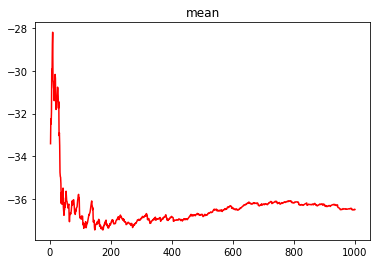

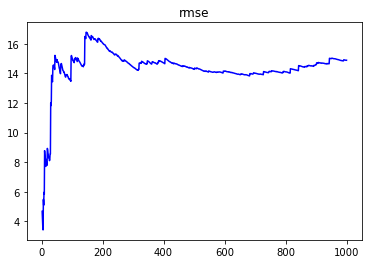

In [159]:
import matplotlib.pyplot as plt
t = np.arange(2, num+1, 1)
plt.plot(t,mean_quantiles,'r-')
plt.title('mean')
plt.show()

plt.plot(t,rmse,'b-')
plt.title('rmse')
plt.show()